# Graph Neural Networks (GNN)

Graph based deep learning is currently one of the hottest topics in Machine Learning Research. In the NeurIPS 2020 conference GNNs constituted the most prominent topic, as can be seen in this [list of conference papers](https://github.com/naganandy/graph-based-deep-learning-literature/blob/master/conference-publications/folders/publications_neurips20/README.md). 

However, GNNs are not only subject of research. They have already found their way into a wide range of [applications](https://medium.com/criteo-engineering/top-applications-of-graph-neural-networks-2021-c06ec82bfc18).

Graph Neural Networks are suitable for Machine Learning tasks on data with structural 
relation between the individual data-points. Examples are e.g. social and communication networks analysis, traffic prediction, fraud detection, etc. [Graph Representation Learning](https://www.cs.mcgill.ca/~wlh/grl_book/)
aims to build and train models for graph datasets to be used for a variety of ML tasks.

This lecture shall provide an understanding of the basic concepts of Graph Neural Networks and their application categories.

## Graph

A graph consists of a set of nodes, which are partially connected by edges. **Nodes** can represent things of different categories such as persons, locations, companies, etc. Nodes may also represent things of the same categorie but different subcategories. **Edges** can be directed or undirected. They also may have weights, which somehow define the *strength* of the connection. Edges can also be of different type, e.g. 
* an edge between a node of type *person* and a node of type *paper* may have the meaning *isAuthorOf* 
* a directed edge between two nodes of type *paper* may mean that the paper of the source node refers to the paper of the target node. 


<figure align="center">
<img src="https://maucher.home.hdm-stuttgart.de/Pics/graph.png" width="500px" align="center">
<figcaption>
Figure 1: Example graph with undirected edges (no arrows) and different node types (colours)
</figcaption>
</figure>

## Graph Neural Networks

In the context of GNNs each node is described by a set of features (a numeric vector). For example, if the nodes represent papers, then the descriptor vector of the nodes may be the Bag-of-Words vector (BoW) of the paper. 

<figure align="center">
<img src="https://maucher.home.hdm-stuttgart.de/Pics/graphNodeDescriptors.png" width="550px" align="center">
<figcaption>
Figure 2: To each node a descriptor (numeric vector) is assigned.
</figcaption>
</figure>


The BoW of a paper depends only on the words, which appear in the paper. Information about the neighbouring nodes is totally ignored. On the other hand, in some applications such information from neighbouring nodes may be helpful. For example, it may be easier to determine the subject of a paper, if not only the words in the paper itself are known, but also the contents of the papers in it's immediate neighbourhood. This is actually what GNNs provide: **GNNs calculate node representations (embeddings), which depend not only on the contents of the node itself, but also on the neighbouring nodes.** The definition of *neighbourhood* depends on the task and the context. For example the immediate neighbours of a scientific paper may be all papers, which are referenced in this paper.



### Message Passing

In a GNN the node representation $h_i^k$ of each node $i$ are adapted over many iteration (k indicates the iteration). At the very beginning to each node $i$ an initial vector $h_i^0$ is assigned, e.g. the BoW vector of a document. Then in each iteration $k>0$ these representations are updated by information from the neighbouring nodes. The image below sketches the update of node 0 in iteration $k$. Let $N(i)$ denote the set of direct neighbours of node $i$, then

1. For each node $u$ in $N(i)$ pass the current descriptor $h_u^k$ to a Feed Forward Neural Network (for example a single fully connected layer). The output of this FFN is called the message $m_u^k$ from node $u$.

2. All messages $m_u^k$ and the current node representation $h_i^{k}$ are **aggregated** by some function which outputs the new representation $h_i^{k+1}$ of node $i$. The aggregation function can be a simple sum-, mean-, or max-operation. However, it can also be implemented by an arbitrary neural layer type as e.g. a fully connected layer or a recurrent layer.   

This process is performed, in parallel, on all nodes $i$ in the graph as node-embeddings in iteration $k+1$ depend on embeddings in iteration $k$. In this way in each iteration each node *grabs* more information from it's surrounding nodes. Finally this *better representations* can be applied for different tasks, such as node-classification, node-clustering, sub-graph-identification, sub-graph-clustering etc. Depending on the task, individual node embeddings of type $h_i^{k}$, or representations of sub-graphs or the entire graph may be required. A simple representation of a subgraph or graph can be obtained by just summing up the node-embeddings of all nodes in the graph or subgraph, respectively. 



<figure align="center">
<img src="https://maucher.home.hdm-stuttgart.de/Pics/graphMessagePassing.png" width="800px" align="center">

<figcaption>
Figure 3: Calculation of new descriptor at node 0.
</figcaption>
</figure>

### Graph Convolutional Network (GCN)

Next, we will consider how the concept of message passing, as introduced in the previous subsection, is implemented in Graph Neural Networks (GNNs)? 

As explained in the previous subsections, in each iteration each node's descriptor vector is updated by the messages from the neighbouring nodes. In a Graph Convolutional Network (GCN) each iteration is implemented by a GCN-layer. I.e. the first update is calculated in the first GCN-layer, the second update is calculated in the second layer and so on. Thus the number of updates and therefore the range of the neighbourhood that is considered in the final node representation is given by the number of GCN layers. Such a stack of GCN-layers is depicted in the right hand side of Figure 4. In this Figure the abbreviation GNN is used for Graph Neural Net (GNN). GNN is more general as GCN, but here we always assume that the GNN is a GCN. The short-cut connections around the GNN layers are necessary, because the new representation of a node is the aggregation of the messages from the neighboring nodes and the old representation of this node.

As depicted in the right hand side of Figure 4, the stack of GCN layers is preceeded by one or more preprocessing layers, which calculate the initial node descriptors. The initial node descriptors do not depend on the neighbouring codes. Moreover, the output of the GCN-layer stack is passed to one or more post-processing layers. These post-processing layers depend on the task. E.g. for the task of node-classification, the post-processing layers assign to each node descriptor at the output of the GCN-layer stack the category of the node. 

In Figure 3, it was assumed, that the message $m_u^k$ coming from node $u$ in iteration $k+1$ is the output of a dense layer (linear layer), whose input is the node descriptor $h_u^k$. In general, as depicted in the left hand-side of the image below, the dense layer can apply Batch-Normalization, Dropout and an arbitrary Activation function.   

<figure align="center">
<img src="https://maucher.home.hdm-stuttgart.de/Pics/GNNDesign.png" width="600px" align="center">
<figcaption>
Figure 4: Image Source: <a href="https://arxiv.org/abs/2011.08843">Design Space for Graph Neural Networks</a> 
</figcaption>
</figure>

Where does the name *Graph Convolutional Layer* come from?

For this take a look to the left hand side of Figure 5. In a *Convolutional Layer* at each position a new value is calculated as the scalar-product of the filter coefficients and the receptive field of the current position (neuron). Each position (neuron) can be considered as a node. And each node has an edge to all other nodes (positions), which belong to the local receptive field of the current position (neuron). Actually, at each position not only one value is calculated, but one value for each feature map. 

With this notion in mind, the difference of a graph convolution layer w.r.t. a convolution layer is that in a GCN each node can have an arbitrary number of neighbouring nodes, whereas in a convolution layer the number of neighbouring nodes is fixed and given by the size of the filter. 

<figure align="center">
<img src="https://maucher.home.hdm-stuttgart.de/Pics/gcnVScnn.png" width="600px" align="center">
<figcaption>
    Figure 5: Image Source: <a href="https://arxiv.org/pdf/1901.00596.pdf">Wu et al.: A Comprehensive Survey on Graph Neural Networks</a>
</figcaption>
</figure>

### Graph Convolutional Network for Node Classification

<figure align="center">
<img src="https://maucher.home.hdm-stuttgart.de/Pics/gcnNodeClassification.png" width="600px" align="center">
<figcaption>
    Image Source: <a href="https://arxiv.org/pdf/1901.00596.pdf">Wu et al.: A Comprehensive Survey on Graph Neural Networks</a>
</figcaption>
</figure>


### Graph Convolutional Network for Graph Classification

<figure align="center">
<img src="https://maucher.home.hdm-stuttgart.de/Pics/gcnGraphClassification.png" width="600px"align="center">
<figcaption>
    Image Source: <a href="https://arxiv.org/pdf/1901.00596.pdf">Wu et al.: A Comprehensive Survey on Graph Neural Networks</a>
</figcaption>
</figure>


<a id='intro'></a>
# Introductory Example: Node Classification with Graph Neural Networks

After learning the basic concepts of Graph Neural Networks, we continue with the implementation of Graph Convolution Networks (GCN). This part is an adaptation of the [Keras tutorial](https://keras.io/examples/graph/gnn_citations/). You don't have to implement the GCN layer and the GCN Network by yourself, but you should study this part carefully, such that you are able 
* to answer the questions at the end of this section 
* to implement the GCN network on the task of music genre prediction in the following section.


## Introduction

This example demonstrates a simple implementation of a [Graph Neural Network](https://arxiv.org/pdf/1901.00596.pdf)
(GNN) model. The model is used for a node prediction task on the [Cora dataset](https://relational.fit.cvut.cz/dataset/CORA)
to predict the subject of a paper given its words and citations network.

Note that, **we implement a Graph Convolution Layer from scratch** to provide a better
understanding of how they work. However, there is a number of specialized TensorFlow-based
libraries that provide rich GNN APIs, such as [Spectral](https://graphneural.network/),
[StellarGraph](https://stellargraph.readthedocs.io/en/stable/README.html), and
[GraphNets](https://github.com/deepmind/graph_nets).

## Setup

In [64]:
import os
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [65]:
np.set_printoptions(suppress=True)

## Prepare the Dataset

The Cora dataset consists of 2,708 scientific papers classified into one of seven classes.
The citation network consists of 5,429 links. Each paper has a binary word vector of size
1,433, indicating the presence of a corresponding word.

### Download the dataset

The dataset has two tap-separated files: `cora.cites` and `cora.content`.

1. The `cora.cites` includes the citation records with two columns:
`cited_paper_id` (target) and `citing_paper_id` (source).
2. The `cora.content` includes the paper content records with 1,435 columns:
`paper_id`, `subject`, and 1,433 binary features.

First the Cora-dataset is downloaded and extracted:

In [66]:
zip_file = keras.utils.get_file(
    fname="cora.tgz",
    origin="https://linqs-data.soe.ucsc.edu/public/lbc/cora.tgz",
    extract=True,
)
data_dir = os.path.join(os.path.dirname(zip_file), "cora")

In [67]:
zip_file

'/Users/johannes/.keras/datasets/cora.tgz'

### Process and visualize the dataset

Then we load the citations data into a Pandas DataFrame.

In [68]:
citations = pd.read_csv(
    os.path.join(data_dir, "cora.cites"),
    sep="\t",
    header=None,
    names=["target", "source"],
)
print("Citations shape:", citations.shape)

Citations shape: (5429, 2)


Now we display a sample of the `citations` DataFrame.
The `target` column includes the paper ids cited by the paper ids in the `source` column.

In [69]:
citations.head()

,target,source
0,35,1033
1,35,103482
2,35,103515
3,35,1050679
4,35,1103960


As can be seen in the output of the next-code cell, there are some papers (e.g. paper 35), which are referenced by many others. Other papers are referenced only once or even not at all.

In [70]:
citations.target.value_counts()

35        166
6213       76
1365       74
3229       61
114        42
         ... 
136766      1
136768      1
137956      1
139738      1
954315      1
Name: target, Length: 1565, dtype: int64

Now let's load the papers data into a Pandas DataFrame.

In [71]:
column_names = ["paper_id"] + [f"term_{idx}" for idx in range(1433)] + ["subject"]
papers = pd.read_csv(
    os.path.join(data_dir, "cora.content"), sep="\t", header=None, names=column_names,
)
print("Papers shape:", papers.shape)

Papers shape: (2708, 1435)


Now we display a sample of the `papers` DataFrame. The DataFrame includes the `paper_id`
and the `subject` columns, as well as 1,433 binary column representing whether a term exists
in the paper or not.

In [72]:
papers.head()

,paper_id,term_0,term_1,term_2,term_3,term_4,term_5,term_6,term_7,term_8,...,term_1424,term_1425,term_1426,term_1427,term_1428,term_1429,term_1430,term_1431,term_1432,subject
0,31336,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,Neural_Networks
1,1061127,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,Rule_Learning
2,1106406,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Reinforcement_Learning
3,13195,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Reinforcement_Learning
4,37879,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Probabilistic_Methods


Let's display the count of the papers in each subject.

In [73]:
print(papers.subject.value_counts())

Neural_Networks           818
Probabilistic_Methods     426
Genetic_Algorithms        418
Theory                    351
Case_Based                298
Reinforcement_Learning    217
Rule_Learning             180
Name: subject, dtype: int64


We convert the paper ids and the subjects into zero-based indices.

In [74]:
class_values = sorted(papers["subject"].unique())
class_idx = {name: id for id, name in enumerate(class_values)}
paper_idx = {name: idx for idx, name in enumerate(sorted(papers["paper_id"].unique()))}

papers["paper_id"] = papers["paper_id"].apply(lambda name: paper_idx[name])
citations["source"] = citations["source"].apply(lambda name: paper_idx[name])
citations["target"] = citations["target"].apply(lambda name: paper_idx[name])
papers["subject"] = papers["subject"].apply(lambda value: class_idx[value])

In [75]:
class_values = sorted(papers["subject"].unique())
class_idx = {name: id for id, name in enumerate(class_values)}
paper_idx = {name: idx for idx, name in enumerate(sorted(papers["paper_id"].unique()))}

In [76]:
class_idx

{0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6}

In [77]:
paper_idx

{0: 0,
 1: 1,
 2: 2,
 3: 3,
 4: 4,
 5: 5,
 6: 6,
 7: 7,
 8: 8,
 9: 9,
 10: 10,
 11: 11,
 12: 12,
 13: 13,
 14: 14,
 15: 15,
 16: 16,
 17: 17,
 18: 18,
 19: 19,
 20: 20,
 21: 21,
 22: 22,
 23: 23,
 24: 24,
 25: 25,
 26: 26,
 27: 27,
 28: 28,
 29: 29,
 30: 30,
 31: 31,
 32: 32,
 33: 33,
 34: 34,
 35: 35,
 36: 36,
 37: 37,
 38: 38,
 39: 39,
 40: 40,
 41: 41,
 42: 42,
 43: 43,
 44: 44,
 45: 45,
 46: 46,
 47: 47,
 48: 48,
 49: 49,
 50: 50,
 51: 51,
 52: 52,
 53: 53,
 54: 54,
 55: 55,
 56: 56,
 57: 57,
 58: 58,
 59: 59,
 60: 60,
 61: 61,
 62: 62,
 63: 63,
 64: 64,
 65: 65,
 66: 66,
 67: 67,
 68: 68,
 69: 69,
 70: 70,
 71: 71,
 72: 72,
 73: 73,
 74: 74,
 75: 75,
 76: 76,
 77: 77,
 78: 78,
 79: 79,
 80: 80,
 81: 81,
 82: 82,
 83: 83,
 84: 84,
 85: 85,
 86: 86,
 87: 87,
 88: 88,
 89: 89,
 90: 90,
 91: 91,
 92: 92,
 93: 93,
 94: 94,
 95: 95,
 96: 96,
 97: 97,
 98: 98,
 99: 99,
 100: 100,
 101: 101,
 102: 102,
 103: 103,
 104: 104,
 105: 105,
 106: 106,
 107: 107,
 108: 108,
 109: 109,
 110: 110,

In [78]:
papers.shape

(2708, 1435)

In [79]:
citations.head()

,target,source
0,0,21
1,0,905
2,0,906
3,0,1909
4,0,1940


Now let's visualize the citation graph. Each node in the graph represents a paper,
and the color of the node corresponds to its subject. Note that we only show a sample of
the papers in the dataset.

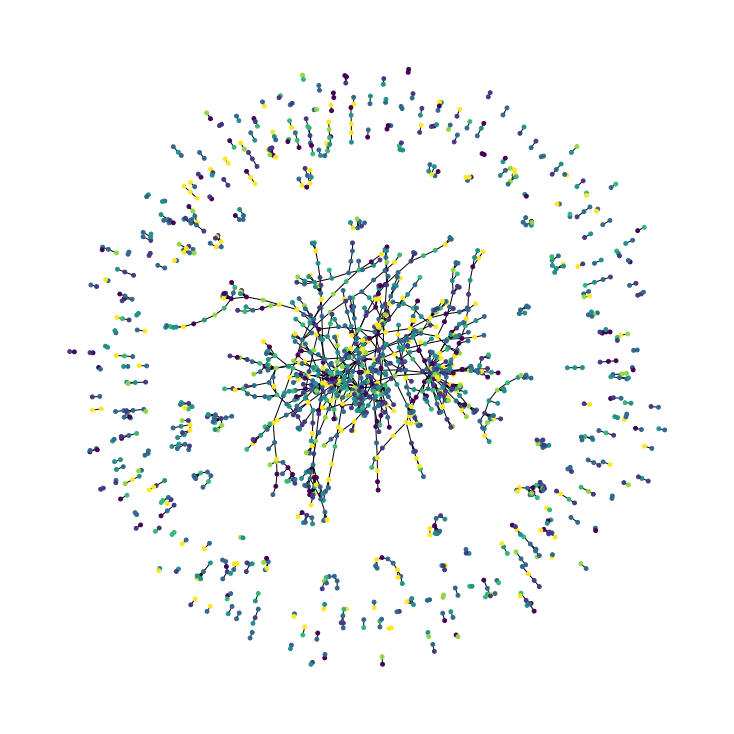

In [80]:
plt.figure(figsize=(10, 10))
colors = papers["subject"].tolist()
cora_graph = nx.from_pandas_edgelist(citations.sample(n=1500))
subjects = list(papers[papers["paper_id"].isin(list(cora_graph.nodes))]["subject"])
nx.draw_spring(cora_graph, node_size=15, node_color=subjects)


### Split the dataset into stratified train and test sets

In [81]:
train_data, test_data = [], []

for _, group_data in papers.groupby("subject"):
    # Select around 85% of the dataset for training and validation, and 15% for test
    random_selection = np.random.rand(len(group_data.index)) <= 0.5
    train_data.append(group_data[random_selection])
    test_data.append(group_data[~random_selection])

train_data = pd.concat(train_data).sample(frac=1)
test_data = pd.concat(test_data).sample(frac=1)

print("Train data shape:", train_data.shape)
print("Test data shape:", test_data.shape)

Train data shape: (1369, 1435)
Test data shape: (1339, 1435)


## Implement, Train and Evaluate Experiment

In [82]:
hidden_units = [32, 32]
learning_rate = 0.01
dropout_rate = 0.5
num_epochs = 300
batch_size = 256

This function compiles and trains an input model using the given training data.

In [83]:

def run_experiment(model, x_train, y_train):
    # Compile the model.
    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate),
        loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
        metrics=[keras.metrics.SparseCategoricalAccuracy(name="acc")],
    )
    # Create an early stopping callback.
    early_stopping = keras.callbacks.EarlyStopping(
        monitor="val_acc", patience=50, restore_best_weights=True
    )
    # Fit the model.
    history = model.fit(
        x=x_train,
        y=y_train,
        epochs=num_epochs,
        batch_size=batch_size,
        validation_split=0.3,
        callbacks=[early_stopping],
    )

    return history


This function displays the loss and accuracy curves of the model during training.

In [84]:

def display_learning_curves(history):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

    ax1.plot(history.history["loss"])
    ax1.plot(history.history["val_loss"])
    ax1.legend(["train", "test"], loc="upper right")
    ax1.set_xlabel("Epochs")
    ax1.set_ylabel("Loss")

    ax2.plot(history.history["acc"])
    ax2.plot(history.history["val_acc"])
    ax2.legend(["train", "test"], loc="upper right")
    ax2.set_xlabel("Epochs")
    ax2.set_ylabel("Accuracy")
    plt.show()


## Implement Feedforward Network (FFN) Module

We will use this module in the baseline and the GNN models.

In [85]:

def create_ffn(hidden_units, dropout_rate, name=None):
    fnn_layers = []

    for units in hidden_units:
        fnn_layers.append(layers.BatchNormalization())
        fnn_layers.append(layers.Dropout(dropout_rate))
        fnn_layers.append(layers.Dense(units, activation=tf.nn.gelu))

    return keras.Sequential(fnn_layers, name=name)


## Build a Baseline Neural Network Model

### Prepare the data for the baseline model

In [86]:
feature_names = set(papers.columns) - {"paper_id", "subject"}
num_features = len(feature_names)
num_classes = len(class_idx)

# Create train and test features as a numpy array.
x_train = train_data[feature_names].to_numpy()
x_test = test_data[feature_names].to_numpy()
# Create train and test targets as a numpy array.
y_train = train_data["subject"]
y_test = test_data["subject"]

/var/folders/68/9tltm6l520v0stj3qjlc5v9w0000gn/T/ipykernel_85979/3641831727.py:6: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  x_train = train_data[feature_names].to_numpy()
/var/folders/68/9tltm6l520v0stj3qjlc5v9w0000gn/T/ipykernel_85979/3641831727.py:7: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  x_test = test_data[feature_names].to_numpy()


In [87]:
num_classes

7

### Implement a baseline classifier

We add five FFN blocks with skip connections, so that we generate a baseline model with
roughly the same number of parameters as the GNN models to be built later.

In [88]:
def create_baseline_model(hidden_units, num_classes, dropout_rate=0.2):
    inputs = layers.Input(shape=(num_features,), name="input_features")
    x = create_ffn(hidden_units, dropout_rate, name=f"ffn_block1")(inputs)
    for block_idx in range(4):
        # Create an FFN block.
        x1 = create_ffn(hidden_units, dropout_rate, name=f"ffn_block{block_idx + 2}")(x)
        # Add skip connection.
        x = layers.Add(name=f"skip_connection{block_idx + 2}")([x, x1])
    # Compute logits.
    logits = layers.Dense(num_classes, name="logits")(x)
    # Create the model.
    return keras.Model(inputs=inputs, outputs=logits, name="baseline")

In [89]:
baseline_model = create_baseline_model(hidden_units, num_classes, dropout_rate)
baseline_model.summary()

Model: "baseline"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_features (InputLayer)    [(None, 1433)]       0           []                               
                                                                                                  
 ffn_block1 (Sequential)        (None, 32)           52804       ['input_features[0][0]']         
                                                                                                  
 ffn_block2 (Sequential)        (None, 32)           2368        ['ffn_block1[0][0]']             
                                                                                                  
 skip_connection2 (Add)         (None, 32)           0           ['ffn_block1[0][0]',             
                                                                  'ffn_block2[0][0]']      

### Train the baseline classifier

In [90]:
history = run_experiment(baseline_model, x_train, y_train)

Epoch 1/300
4/4 [==============================] - 3s 106ms/step - loss: 4.5889 - acc: 0.1514 - val_loss: 1.9021 - val_acc: 0.1703
Epoch 2/300
4/4 [==============================] - 0s 13ms/step - loss: 2.9278 - acc: 0.2547 - val_loss: 1.9420 - val_acc: 0.1509
Epoch 3/300
4/4 [==============================] - 0s 13ms/step - loss: 2.4649 - acc: 0.2484 - val_loss: 1.9246 - val_acc: 0.1509
Epoch 4/300
4/4 [==============================] - 0s 13ms/step - loss: 2.3241 - acc: 0.2578 - val_loss: 1.8946 - val_acc: 0.1509
Epoch 5/300
4/4 [==============================] - 0s 15ms/step - loss: 2.1056 - acc: 0.3132 - val_loss: 1.8766 - val_acc: 0.1898
Epoch 6/300
4/4 [==============================] - 0s 14ms/step - loss: 1.9479 - acc: 0.3267 - val_loss: 1.8698 - val_acc: 0.2457
Epoch 7/300
4/4 [==============================] - 0s 14ms/step - loss: 1.9424 - acc: 0.3152 - val_loss: 1.8675 - val_acc: 0.2555
Epoch 8/300
4/4 [==============================] - 0s 13ms/step - loss: 1.7579 - acc: 0.3

4/4 [==============================] - 0s 12ms/step - loss: 0.4014 - acc: 0.8518 - val_loss: 0.8554 - val_acc: 0.7129
Epoch 64/300
4/4 [==============================] - 0s 12ms/step - loss: 0.4027 - acc: 0.8685 - val_loss: 0.8415 - val_acc: 0.7251
Epoch 65/300
4/4 [==============================] - 0s 12ms/step - loss: 0.4130 - acc: 0.8612 - val_loss: 0.8558 - val_acc: 0.7226
Epoch 66/300
4/4 [==============================] - 0s 13ms/step - loss: 0.4154 - acc: 0.8528 - val_loss: 0.8458 - val_acc: 0.7226
Epoch 67/300
4/4 [==============================] - 0s 12ms/step - loss: 0.4152 - acc: 0.8518 - val_loss: 0.8777 - val_acc: 0.7178
Epoch 68/300
4/4 [==============================] - 0s 12ms/step - loss: 0.3800 - acc: 0.8633 - val_loss: 0.8912 - val_acc: 0.7226
Epoch 69/300
4/4 [==============================] - 0s 13ms/step - loss: 0.4019 - acc: 0.8622 - val_loss: 0.8585 - val_acc: 0.7275
Epoch 70/300
4/4 [==============================] - 0s 12ms/step - loss: 0.3623 - acc: 0.8737 - 

4/4 [==============================] - 0s 16ms/step - loss: 0.3094 - acc: 0.8967 - val_loss: 1.0222 - val_acc: 0.7032
Epoch 126/300
4/4 [==============================] - 0s 17ms/step - loss: 0.3423 - acc: 0.8862 - val_loss: 1.0330 - val_acc: 0.6983
Epoch 127/300
4/4 [==============================] - 0s 16ms/step - loss: 0.2945 - acc: 0.8998 - val_loss: 1.0049 - val_acc: 0.7007
Epoch 128/300
4/4 [==============================] - 0s 18ms/step - loss: 0.2955 - acc: 0.8946 - val_loss: 1.0071 - val_acc: 0.7007


Let's plot the learning curves.

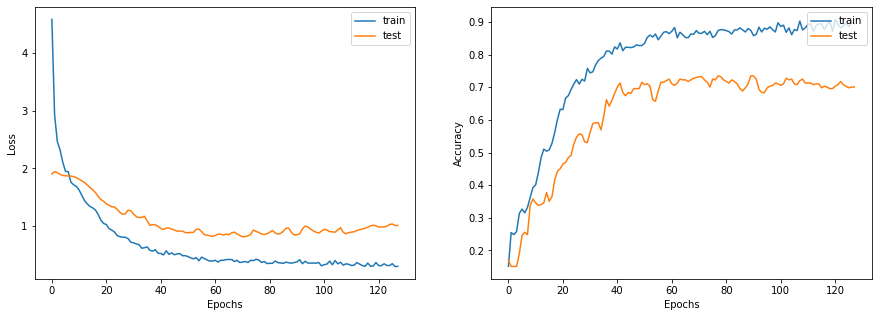

In [91]:
display_learning_curves(history)

Now we evaluate the baseline model on the test data split.

In [92]:
_, test_accuracy = baseline_model.evaluate(x=x_test, y=y_test, verbose=0)
print(f"Test accuracy: {round(test_accuracy * 100, 2)}%")

Test accuracy: 72.96%


### Examine the baseline model predictions

Let's create new data instances by randomly generating binary word vectors with respect to
the word presence probabilities.

In [93]:

def generate_random_instances(num_instances):
    token_probability = x_train.mean(axis=0)
    instances = []
    for _ in range(num_instances):
        probabilities = np.random.uniform(size=len(token_probability))
        instance = (probabilities <= token_probability).astype(int)
        instances.append(instance)

    return np.array(instances)


def display_class_probabilities(probabilities):
    for instance_idx, probs in enumerate(probabilities):
        print(f"Instance {instance_idx + 1}:")
        for class_idx, prob in enumerate(probs):
            print(f"- {class_values[class_idx]}: {round(prob * 100, 2)}%")


Now we show the baseline model predictions given these randomly generated instances.

In [94]:
new_instances = generate_random_instances(num_classes)
logits = baseline_model.predict(new_instances)
probabilities = keras.activations.softmax(tf.convert_to_tensor(logits)).numpy()
display_class_probabilities(probabilities)

1/1 [==============================] - 0s 196ms/step
Instance 1:
- 0: 3.09%
- 1: 19.7%
- 2: 22.61%
- 3: 3.85%
- 4: 26.74%
- 5: 6.26%
- 6: 17.75%
Instance 2:
- 0: 1.98%
- 1: 8.17%
- 2: 32.91%
- 3: 44.44%
- 4: 5.29%
- 5: 1.51%
- 6: 5.71%
Instance 3:
- 0: 0.09%
- 1: 98.27%
- 2: 1.19%
- 3: 0.09%
- 4: 0.18%
- 5: 0.07%
- 6: 0.1%
Instance 4:
- 0: 0.65%
- 1: 6.01%
- 2: 80.48%
- 3: 1.6%
- 4: 1.97%
- 5: 3.44%
- 6: 5.85%
Instance 5:
- 0: 0.2%
- 1: 0.7%
- 2: 89.49%
- 3: 1.35%
- 4: 1.74%
- 5: 0.47%
- 6: 6.06%
Instance 6:
- 0: 0.24%
- 1: 0.7%
- 2: 97.71%
- 3: 0.85%
- 4: 0.1%
- 5: 0.11%
- 6: 0.28%
Instance 7:
- 0: 0.74%
- 1: 9.94%
- 2: 24.44%
- 3: 1.91%
- 4: 0.89%
- 5: 0.82%
- 6: 61.26%


## Build a Graph Neural Network Model

<a id='graphinfo'></a>
### Prepare the data for the graph model

Preparing and loading the graphs data into the model for training is the most challenging
part in GNN models, which is addressed in different ways by the specialised libraries.
In this example, we show a simple approach for preparing and using graph data that is suitable
if your dataset consists of a single graph that fits entirely in memory.

The graph data is represented by the `graph_info` tuple, which consists of the following
three elements:

1. `node_features`: This is a `[num_nodes, num_features]` NumPy array that includes the
node features. In this dataset, the nodes are the papers, and the `node_features` are the
word-presence binary vectors of each paper.
2. `edges`:  This is a `[2, num_edges]` NumPy array. The first column contains the id of the source-node and the second column contains the id of the target node of an edge. However, in this application we do not consider directed edges, i.e. it does matter which of the two nodes is the target and the source, respectively.
3. `edge_weights` (optional): This is a `[num_edges]` NumPy array that includes the edge weights, which *quantify*
the relationships between nodes in the graph. In this example, there are no weights for the paper citations.

In [95]:
# Create an edges array (sparse adjacency matrix) of shape [2, num_edges].
edges = citations[["source", "target"]].values.T
# Create an edge weights array of ones.
edge_weights = tf.ones(shape=edges.shape[1])
# Create a node features array of shape [num_nodes, num_features].
node_features = tf.cast(
    papers.sort_values("paper_id")[feature_names].values, dtype=tf.dtypes.float32
)
# Create graph info tuple with node_features, edges, and edge_weights.
graph_info = (node_features, edges, edge_weights)

print("Edges shape:", edges.shape)
print("Edge-Weight shape:", edge_weights.shape)
print("Nodes shape:", node_features.shape)

Edges shape: (2, 5429)
Edge-Weight shape: (5429,)
Nodes shape: (2708, 1433)


/var/folders/68/9tltm6l520v0stj3qjlc5v9w0000gn/T/ipykernel_85979/2435838809.py:7: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  papers.sort_values("paper_id")[feature_names].values, dtype=tf.dtypes.float32


In [96]:
edges

array([[  21,  905,  906, ..., 2586, 1874, 2707],
       [   0,    0,    0, ..., 1874, 1876, 1897]])

In [97]:
edge_weights

<tf.Tensor: shape=(5429,), dtype=float32, numpy=array([1., 1., 1., ..., 1., 1., 1.], dtype=float32)>

### Implement a graph convolution layer

We implement a graph convolution module as a [Keras Layer](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Layer?version=nightly).
Our `GraphConvLayer` performs the following steps:

1. **Prepare**: The input node representations are processed using a FFN to produce a *message*. You can simplify
the processing by only applying linear transformation to the representations.
2. **Aggregate**: The messages of the neighbours of each node are aggregated with
respect to the `edge_weights` using a *permutation invariant* pooling operation, such as *sum*, *mean*, and *max*,
to prepare a single aggregated message for each node. See, for example, [tf.math.unsorted_segment_sum](https://www.tensorflow.org/api_docs/python/tf/math/unsorted_segment_sum)
APIs used to aggregate neighbour messages.
3. **Update**: The `node_repesentations` and `aggregated_messages`—both of shape `[num_nodes, representation_dim]`—
are combined and processed to produce the new state of the node representations (node embeddings).
If `combination_type` is `gru`, the `node_repesentations` and `aggregated_messages` are stacked to create a sequence,
then processed by a GRU layer. Otherwise, the `node_repesentations` and `aggregated_messages` are added
or concatenated, then processed using a FFN.


The technique implemented use ideas from [Graph Convolutional Networks](https://arxiv.org/abs/1609.02907),
[GraphSage](https://arxiv.org/abs/1706.02216), [Graph Isomorphism Network](https://arxiv.org/abs/1810.00826),
[Simple Graph Networks](https://arxiv.org/abs/1902.07153), and
[Gated Graph Sequence Neural Networks](https://arxiv.org/abs/1511.05493).
Two other key techniques that are not covered are [Graph Attention Networks](https://arxiv.org/abs/1710.10903)
and [Message Passing Neural Networks](https://arxiv.org/abs/1704.01212).

In [98]:

class GraphConvLayer(layers.Layer):
    def __init__(
        self,
        hidden_units,
        dropout_rate=0.2,
        aggregation_type="mean",
        combination_type="concat",
        normalize=False,
        *args,
        **kwargs,
    ):
        super(GraphConvLayer, self).__init__(*args, **kwargs)

        self.aggregation_type = aggregation_type
        self.combination_type = combination_type
        self.normalize = normalize

        self.ffn_prepare = create_ffn(hidden_units, dropout_rate)
        if self.combination_type == "gated":
            self.update_fn = layers.GRU(
                units=hidden_units,
                activation="tanh",
                recurrent_activation="sigmoid",
                dropout=dropout_rate,
                return_state=True,
                recurrent_dropout=dropout_rate,
            )
        else:
            self.update_fn = create_ffn(hidden_units, dropout_rate)

    def prepare(self, node_repesentations, weights=None):
        # node_repesentations shape is [num_edges, embedding_dim].
        messages = self.ffn_prepare(node_repesentations)
        if weights is not None:
            messages = messages * tf.expand_dims(weights, -1)
        return messages

    def aggregate(self, node_indices, neighbour_messages):
        # node_indices shape is [num_edges].
        # neighbour_messages shape: [num_edges, representation_dim].
        num_nodes = tf.math.reduce_max(node_indices) + 1
        if self.aggregation_type == "sum":
            aggregated_message = tf.math.unsorted_segment_sum(
                neighbour_messages, node_indices, num_segments=num_nodes
            )
        elif self.aggregation_type == "mean":
            aggregated_message = tf.math.unsorted_segment_mean(
                neighbour_messages, node_indices, num_segments=num_nodes
            )
        elif self.aggregation_type == "max":
            aggregated_message = tf.math.unsorted_segment_max(
                neighbour_messages, node_indices, num_segments=num_nodes
            )
        else:
            raise ValueError(f"Invalid aggregation type: {self.aggregation_type}.")

        return aggregated_message

    def update(self, node_repesentations, aggregated_messages):
        # node_repesentations shape is [num_nodes, representation_dim].
        # aggregated_messages shape is [num_nodes, representation_dim].
        if self.combination_type == "gru":
            # Create a sequence of two elements for the GRU layer.
            h = tf.stack([node_repesentations, aggregated_messages], axis=1)
        elif self.combination_type == "concat":
            # Concatenate the node_repesentations and aggregated_messages.
            h = tf.concat([node_repesentations, aggregated_messages], axis=1)
        elif self.combination_type == "add":
            # Add node_repesentations and aggregated_messages.
            h = node_repesentations + aggregated_messages
        else:
            raise ValueError(f"Invalid combination type: {self.combination_type}.")

        # Apply the processing function.
        node_embeddings = self.update_fn(h)
        if self.combination_type == "gru":
            node_embeddings = tf.unstack(node_embeddings, axis=1)[-1]

        if self.normalize:
            node_embeddings = tf.nn.l2_normalize(node_embeddings, axis=-1)
        return node_embeddings

    def call(self, inputs):
        """Process the inputs to produce the node_embeddings.

        inputs: a tuple of three elements: node_repesentations, edges, edge_weights.
        Returns: node_embeddings of shape [num_nodes, representation_dim].
        """

        node_repesentations, edges, edge_weights = inputs
        # Get node_indices (source) and neighbour_indices (target) from edges.
        node_indices, neighbour_indices = edges[0], edges[1]
        # neighbour_repesentations shape is [num_edges, representation_dim].
        neighbour_repesentations = tf.gather(node_repesentations, neighbour_indices)

        # Prepare the messages of the neighbours.
        neighbour_messages = self.prepare(neighbour_repesentations, edge_weights)
        # Aggregate the neighbour messages.
        aggregated_messages = self.aggregate(node_indices, neighbour_messages)
        # Update the node embedding with the neighbour messages.
        return self.update(node_repesentations, aggregated_messages)


### Implement a graph neural network node classifier

The GNN classification model follows the [Design Space for Graph Neural Networks](https://arxiv.org/abs/2011.08843) approach,
as follows:

1. Apply preprocessing using FFN to the node features to generate initial node representations.
2. Apply one or more graph convolutional layer, with skip connections,  to the node representation
to produce node embeddings.
3. Apply post-processing using FFN to the node embeddings to generate the final node embeddings.
4. Feed the node embeddings in a Softmax layer to predict the node class.

<figure align="center">
<img src="https://maucher.home.hdm-stuttgart.de/Pics/GNNDesign.png" width="600px" align="center">
<figcaption>
Image Source: <a href="https://arxiv.org/abs/2011.08843">Design Space for Graph Neural Networks</a> 
</figcaption>
</figure>

Each graph convolutional layer added captures information from a further level of neighbours.
However, adding many graph convolutional layer can cause oversmoothing, where the model
produces similar embeddings for all the nodes.

Note that the `graph_info` passed to the constructor of the Keras model, and used as a *property*
of the Keras model object, rather than input data for training or prediction.
The model will accept a **batch** of `node_indices`, which are used to lookup the
node features and neighbours from the `graph_info`.

In [99]:

class GNNNodeClassifier(tf.keras.Model):
    def __init__(
        self,
        graph_info,
        num_classes,
        hidden_units,
        aggregation_type="sum",
        combination_type="concat",
        dropout_rate=0.2,
        normalize=True,
        *args,
        **kwargs,
    ):
        super(GNNNodeClassifier, self).__init__(*args, **kwargs)

        # Unpack graph_info to three elements: node_features, edges, and edge_weight.
        node_features, edges, edge_weights = graph_info
        self.node_features = node_features
        self.edges = edges
        self.edge_weights = edge_weights
        # Set edge_weights to ones if not provided.
        if self.edge_weights is None:
            self.edge_weights = tf.ones(shape=edges.shape[1])
        # Scale edge_weights to sum to 1.
        self.edge_weights = self.edge_weights / tf.math.reduce_sum(self.edge_weights)

        # Create a process layer.
        self.preprocess = create_ffn(hidden_units, dropout_rate, name="preprocess")
        # Create the first GraphConv layer.
        self.conv1 = GraphConvLayer(
            hidden_units,
            dropout_rate,
            aggregation_type,
            combination_type,
            normalize,
            name="graph_conv1",
        )
        # Create the second GraphConv layer.
        self.conv2 = GraphConvLayer(
            hidden_units,
            dropout_rate,
            aggregation_type,
            combination_type,
            normalize,
            name="graph_conv2",
        )
        # Create a postprocess layer.
        self.postprocess = create_ffn(hidden_units, dropout_rate, name="postprocess")
        # Create a compute logits layer.
        self.compute_logits = layers.Dense(units=num_classes, name="logits")

    def call(self, input_node_indices):
        # Preprocess the node_features to produce node representations.
        x = self.preprocess(self.node_features)
        # Apply the first graph conv layer.
        x1 = self.conv1((x, self.edges, self.edge_weights))
        # Skip connection.
        x = x1 + x
        # Apply the second graph conv layer.
        x2 = self.conv2((x, self.edges, self.edge_weights))
        # Skip connection.
        x = x2 + x
        # Postprocess node embedding.
        x = self.postprocess(x)
        # Fetch node embeddings for the input node_indices.
        node_embeddings = tf.squeeze(tf.gather(x, input_node_indices))
        # Compute logits
        return self.compute_logits(node_embeddings)


Let's test instantiating and calling the GNN model.
Notice that if you provide `N` node indices, the output will be a tensor of shape `[N, num_classes]`,
regardless of the size of the graph.

In [100]:
def create_ffn(hidden_units, dropout_rate, name=None):
    fnn_layers = []

    for units in hidden_units:
        fnn_layers.append(layers.BatchNormalization())
        fnn_layers.append(layers.Dropout(dropout_rate))
        fnn_layers.append(layers.Dense(units, activation=tf.nn.gelu))

    return keras.Sequential(fnn_layers, name=name)

In [101]:
gnn_model = GNNNodeClassifier(
    graph_info=graph_info,
    num_classes=num_classes,
    hidden_units=hidden_units,
    dropout_rate=dropout_rate,
    name="gnn_model",
)

print("GNN output shape:", gnn_model([1, 10, 100]))

gnn_model.summary()

GNN output shape: tf.Tensor(
[[ 0.03601404 -0.01548645  0.00206448  0.00862695 -0.09617302 -0.06045327
  -0.04300931]
 [ 0.079326   -0.10742673 -0.00494084 -0.02116663  0.13599855 -0.06459352
  -0.08425424]
 [ 0.02355492  0.00252466 -0.01546108  0.04737538 -0.1041384   0.00663401
   0.00331598]], shape=(3, 7), dtype=float32)
Model: "gnn_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 preprocess (Sequential)     (2708, 32)                52804     
                                                                 
 graph_conv1 (GraphConvLayer  multiple                 5888      
 )                                                               
                                                                 
 graph_conv2 (GraphConvLayer  multiple                 5888      
 )                                                               
                                                            

### Train the GNN model

Note that we use the standard *supervised* cross-entropy loss to train the model.
However, we can add another *self-supervised* loss term for the generated node embeddings
that makes sure that neighbouring nodes in graph have similar representations, while faraway
nodes have dissimilar representations.

In [ ]:
x_train = train_data.paper_id.to_numpy()
#print(x_train.shape)
history = run_experiment(gnn_model, x_train, y_train)

Let's plot the learning curves

In [ ]:
display_learning_curves(history)

Now we evaluate the GNN model on the test data split.
The results may vary depending on the training sample, however the GNN model always outperforms
the baseline model in terms of the test accuracy.

In [ ]:
x_test = test_data.paper_id.to_numpy()
_, test_accuracy = gnn_model.evaluate(x=x_test, y=y_test, verbose=0)
print(f"Test accuracy: {round(test_accuracy * 100, 2)}%")

### Examine the GNN model predictions

Let's add the new instances as nodes to the `node_features`, and generate links
(citations) to existing nodes.

In [ ]:
# First we add the N new_instances as nodes to the graph
# by appending the new_instance to node_features.
num_nodes = node_features.shape[0]
new_node_features = np.concatenate([node_features, new_instances])
# Second we add the M edges (citations) from each new node to a set
# of existing nodes in a particular subject
new_node_indices = [i + num_nodes for i in range(num_classes)]
new_citations = []
for subject_idx, group in papers.groupby("subject"):
    subject_papers = list(group.paper_id)
    # Select random x papers specific subject.
    selected_paper_indices1 = np.random.choice(subject_papers, 5)
    # Select random y papers from any subject (where y < x).
    selected_paper_indices2 = np.random.choice(list(papers.paper_id), 2)
    # Merge the selected paper indices.
    selected_paper_indices = np.concatenate(
        [selected_paper_indices1, selected_paper_indices2], axis=0
    )
    # Create edges between a citing paper idx and the selected cited papers.
    citing_paper_indx = new_node_indices[subject_idx]
    for cited_paper_idx in selected_paper_indices:
        new_citations.append([citing_paper_indx, cited_paper_idx])

new_citations = np.array(new_citations).T
new_edges = np.concatenate([edges, new_citations], axis=1)

Now let's update the `node_features` and the `edges` in the GNN model.

In [ ]:
print("Original node_features shape:", gnn_model.node_features.shape)
print("Original edges shape:", gnn_model.edges.shape)
gnn_model.node_features = new_node_features
gnn_model.edges = new_edges
gnn_model.edge_weights = tf.ones(shape=new_edges.shape[1])
print("New node_features shape:", gnn_model.node_features.shape)
print("New edges shape:", gnn_model.edges.shape)

logits = gnn_model.predict(tf.convert_to_tensor(new_node_indices))
probabilities = keras.activations.softmax(tf.convert_to_tensor(logits)).numpy()
display_class_probabilities(probabilities)

Notice that the probabilities of the expected subjects
(to which several citations are added) are higher compared to the baseline model.